#                        Data analysis on Los Angeles crime from year 2010 to 2017


Submitted By :
Parth Oza,
Weibin Ma,
Yujia Lian

In [1]:
import plotly
import folium
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.offline as off
import numpy as np
import pandas as pd
import geocoder
import pprint
import gmplot
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.plotly as py
from pandas.tools.plotting import table
import pygal
import matplotlib.pyplot as plt
import plotly.offline as off
import pymysql
import calendar
from folium.plugins import MarkerCluster
from datetime import datetime
import seaborn as sns
from wordcloud import WordCloud
from folium.plugins import HeatMap
conn = pymysql.connect(host="127.0.0.1", user = "root", passwd = "123456",db='eas503db',local_infile=True)

In [2]:
plotly.tools.set_credentials_file(username='weibinma0402', api_key='rktuS0hGkMypqqhXoOHB')

In [15]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
cursor = conn.cursor()

In [49]:
cursor.execute("""
create database if not exists eas503db;
use eas503db;
drop table if exists la_crime_data;
create table la_crime_data(
    DR_Number int(10),
    Date_Reported text,
    Date_Occurred text,
    Time_Occurred mediumint(4) ZEROFILL,
    Area_ID int(2),
    Area_Name text,
    Reporting_District int(4),
    Crime_Code int(3),
    Crime_Code_Description text,
    MO_Codes text,
    Victim_Age int(2),
    Victim_Sex text,
    Victim_Descent text,
    Premise_Code int(3),
    Premise_Description text,
    Weapon_Used_Code text,
    Weapon_Description text,
    Status_Code text,
    Status_Description text,
    Crime_Code_1 int(3),
    Crime_Code_2 int(3),
    Crime_Code_3 int(3),
    Crime_Code_4 int(3),
    Address text,
    Cross_Street text,
    Location varchar(32)
    );
""")

1

In [53]:
cursor.execute("""
LOAD DATA LOCAL INFILE '/Users/yujialian/Documents/UB_DS_course/EAS_503/final_project/Crime_Data_from_2010_to_Present.csv' INTO TABLE eas503db.la_crime_data FIELDS TERMINATED BY ',' ENCLOSED BY '"' LINES TERMINATED BY '\n' IGNORE 1 LINES;
""")
conn.commit()

/Users/maweibin/anaconda/lib/python3.6/site-packages/pymysql/cursors.py:166: Warning:

(1366, "Incorrect integer value: '' for column 'Crime_Code_2' at row 1")

/Users/maweibin/anaconda/lib/python3.6/site-packages/pymysql/cursors.py:166: Warning:

(1366, "Incorrect integer value: '' for column 'Crime_Code_3' at row 1")

/Users/maweibin/anaconda/lib/python3.6/site-packages/pymysql/cursors.py:166: Warning:

(1366, "Incorrect integer value: '' for column 'Crime_Code_4' at row 1")

/Users/maweibin/anaconda/lib/python3.6/site-packages/pymysql/cursors.py:166: Warning:

(1366, "Incorrect integer value: '' for column 'Victim_Age' at row 2")

/Users/maweibin/anaconda/lib/python3.6/site-packages/pymysql/cursors.py:166: Warning:

(1366, "Incorrect integer value: '' for column 'Crime_Code_2' at row 2")

/Users/maweibin/anaconda/lib/python3.6/site-packages/pymysql/cursors.py:166: Warning:

(1366, "Incorrect integer value: '' for column 'Crime_Code_3' at row 2")

/Users/maweibin/anaconda/lib/python3

In [54]:
cursor.execute("""
ALTER TABLE la_crime_data ADD DateTimeOccurred DATETIME after Time_Occurred;
UPDATE la_crime_data SET DateTimeOccurred = STR_TO_DATE(CONCAT(Date_Occurred, ' ', Time_Occurred), '%m/%d/%Y %H%i%s');
""")
conn.commit()

In [55]:
cursor.execute("ALTER TABLE la_crime_data ADD Date DATE after Date_Occurred;")
cursor.execute("UPDATE la_crime_data SET Date = STR_TO_DATE(Date_Occurred, '%m/%d/%Y');")
conn.commit()

            The following graph shows the distribution of Crimes in LA city from 2010 through 2017

In [4]:
qry3="""
select count(*) as Count, left(substring(Date_Occurred,1),50) as Crimes_Date from la_crime_data group by Crimes_Date order by Crimes_Date;"""
df3=pd.DataFrame(pd.read_sql(qry3,conn))
df3['Crimes_Date'] =pd.to_datetime(df3['Crimes_Date'])
ndf=df3.sort_values(by='Crimes_Date')
trace = go.Scatter(x=ndf['Crimes_Date'],
                   y=ndf.Count)

data = [trace]
layout = dict(
    title='Crimes By Day, Month and Year in LA City',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

Gender-Wise distributions of Crimes

In [5]:
qry1="""
SELECT count(*) as Victim_Count,
CASE
when Victim_Sex = 'F' then 'Female'
when Victim_Sex = 'M' then 'Male'
else 'Unknown'
END as Sex
from la_crime_data
group by Sex;"""
df1=pd.DataFrame(pd.read_sql(qry1,conn))
Victim_Count=df1["Victim_Count"].tolist()
Victim_Sex=df1["Sex"].tolist()
trace1 = go.Bar(
    x=Victim_Sex,
    y=Victim_Count,
    xaxis='x2',
    yaxis='y2',
    marker=dict(color="Purple"),
    name=Victim_Sex,
    showlegend=False
)
trace2 = go.Pie(
    labels=Victim_Sex,
    values=Victim_Count,
    domain=dict(x=[0, 0.45]),
    text=Victim_Sex,
    hole=0.4,
    sort=False,

)
data = [trace1, trace2]
layout = go.Layout(title="Victims by Gender in Los Angeles City",
                   
        xaxis2=dict(
        domain=[0.5, 0.95],
        anchor='y2'
    ),
    yaxis2=dict(
        domain=[0, 1],
        anchor='x2'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-inset-stream')

Area-Wise Distribution of Crimes

In [6]:
qry5="""
SELECT count(Area_Name) as Count, left(Area_Name,50) as 'Area_Name'
from la_crime_data
group by left(Area_Name,50);"""
df5=pd.DataFrame(pd.read_sql(qry5,conn))
trace1 = go.Bar(
    x=df5["Area_Name"],
    y=df5.Count,
    xaxis='x2',
    yaxis='y2',
    marker=dict(color="Magneta"),
    #name=Victim_Sex,
    showlegend=False
)
trace2 = go.Pie(
    labels=df5["Area_Name"],
    values=df5.Count,
    domain=dict(x=[0, 0.45]),
    text=df5["Area_Name"],
    hole=0.4,
    sort=False,

)
data = [trace1, trace2]
layout = go.Layout(title="Area-Wise Crimes",
                   
        xaxis2=dict(
        domain=[0.5, 0.95],
        anchor='y2'
    ),
    yaxis2=dict(
        domain=[0, 1],
        anchor='x2'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Crimes By Area')

Area & Gender Wise Crimes

In [7]:
qr7="""
SELECT count(*) as Victim_Count,left(Area_Name,50) as 'Area_Name',
case 
when left(Victim_Sex,10) = 'F' then 'Female'
when left(Victim_Sex,10) = 'M' then 'Male'
else 'Unknown'
end as Sex
from la_crime_data group by Sex,left(Area_Name,50);"""
df7=pd.DataFrame(pd.read_sql(qr7,conn))
a1=df7[df7["Sex"]=="Female"]
dfF=a1["Victim_Count"]

a2=df7[df7["Sex"]=="Male"]
dfM=a2["Victim_Count"]

a3=df7[df7["Sex"]=="Unknown"]
dfU=a3["Victim_Count"]



trace1 = go.Bar(
    x=df7["Area_Name"],
    y=dfF,
    name='Female Victims'
)
trace2 = go.Bar(
    x=df7["Area_Name"],
    y=dfM,
    name='Male Victims'
)

trace3 = go.Bar(
    x=df7["Area_Name"],
    y=dfU,
    name='Unknown Victims'
)

data = [trace1, trace2,trace3]
layout = go.Layout(title="Area & Gender wise Crimes",
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

Distribution of Crimes by Descent

In [8]:
qr8="""
select count(*) as Count,case
when Victim_Descent='A' then 'Other Asian'
when Victim_Descent='B' then 'Black'
when Victim_Descent='C' then 'Chinese'
when Victim_Descent='D' then 'Cambodian'
when Victim_Descent='F' then 'Filipino'
when Victim_Descent='G' then 'Guamanian'
when Victim_Descent='H' then 'Hispanic/Latin/Mexican'
when Victim_Descent='I' then 'American Indian/Alaskan'
when Victim_Descent='J' then 'Japanese'
when Victim_Descent='K' then 'Korean'
when Victim_Descent='L' then 'Laotian'
when Victim_Descent='O' then 'Other'
when Victim_Descent='P' then 'Pacific Islander'
when Victim_Descent='S' then 'Samoan'
when Victim_Descent='U' then 'Hawaiian'
when Victim_Descent='V' then 'Vietnamese'
when Victim_Descent='W' then 'White'
when Victim_Descent='X' then 'Unknown'
when Victim_Descent='Z' then 'Asian Indian'
when Victim_Descent='-' then 'Unknown'
else 'Unknown'
end as Race
from la_crime_data group by Race order by Count DESC;"""
df8=pd.DataFrame(pd.read_sql(qr8,conn))
l=[]
c=[120, 125, 130, 135, 140, 145,150,155,160,165,170,175,180,185,190,195,200]
for i in range(15,100):
    i=i+3
    l+=[i]

trace0 = go.Scatter(
    x=df8["Race"],
    y=df8.Count,
    mode='markers',
    marker=dict(
        
        color=np.random.randn(18),
        opacity=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
        size=l[1:20][::-1]
    )
)

data = [trace0]
py.iplot(data, filename='bubblechart-color')

Is LA city safe at day or night?

In [9]:
qr9="""select count(*) as Count,
case
when Time_Occurred between 600 and 1800 then 'Day_Time'
when Time_Occurred between 1801 and 2359 then 'Night_Time'
when Time_Occurred between 0000 and 599 then 'Night_Time'
end as Time,
case
when Victim_Sex = 'F' then 'Female'
when Victim_Sex = 'M' then 'Male'
else 'Unknown'
end as Sex
from la_crime_data group by Time,Sex;"""
df9=pd.read_sql(qr9,conn)
a=df9.loc[(df9["Time"]=='Day_Time') & (df9["Sex"]=='Male')]["Count"][1]
b=df9.loc[(df9["Time"]=='Day_Time') & (df9["Sex"]=='Female')]["Count"][0]
c=df9.loc[(df9["Time"]=='Day_Time') & (df9["Sex"]=='Unknown')]["Count"][2]
A=df9.loc[(df9["Time"]=='Night_Time') & (df9["Sex"]=='Male')]["Count"][4]
B=df9.loc[(df9["Time"]=='Night_Time') & (df9["Sex"]=='Female')]["Count"][3]
C=df9.loc[(df9["Time"]=='Night_Time') & (df9["Sex"]=='Unknown')]["Count"][5]

trace1 = go.Bar(
    y=['Male', 'Female', 'Unknown'],
    x=[a,b,c],
    name='Crimes b/w 6AM-6PM',
    orientation = 'h',
    marker = dict(
        color = 'magneta',
        line = dict(
            color = 'red',
            width = 3)
    )
)
trace2 = go.Bar(
    y=['Male', 'Female', 'Unknown'],
    x=[A,B,C],
    name='Crimes b/w 6PM-6AM',
    orientation = 'h',
    marker = dict(
        color = 'red',
        line = dict(
            color = 'green',
            width = 3)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig=go.Figure(data=data, layout=layout)
py.iplot(fig,image='png')

In [13]:
qry1 = """
SELECT COUNT(*) AS count, Area_Name, Location
FROM la_crime_data 
GROUP BY Area_Name
ORDER BY count DESC;"""
df1 = pd.DataFrame(pd.read_sql(qry1,conn))

In [14]:
## mapping 
locations = df1['Location'].tolist()
a = [eval(s) for s in locations]
b = [list(e) for e in a]

level_count = df1['count'].tolist()
region_names = df1['Area_Name'].tolist()
def color_level(cou):
    if 50000 < cou <= 60000:
        return 'green'
    elif 60000 < cou <= 70000:
        return 'lightgreen'
    elif 70000 < cou <= 80000:
        return 'goldenrod'
    elif 80000 < cou <= 90000:
        return 'orange'
    elif 90000 < cou <= 100000:
        return 'brown'
    else:
        return 'red'
map = folium.Map(location = [34.05,-118.24], zoom_start = 10)
fg = folium.FeatureGroup(name="My Map")

for location,cou,regs in zip(b,level_count, region_names):
    fo = folium.CircleMarker(location, radius = 30, popup = regs, fill = True, 
                             fill_color = color_level(cou), color = 'gray', fill_opacity = 0.7)
    map.add_child(fo)
map.save("crime_distribution_regions.html")
map

We can find the '77th Street' and 'Southwest' have the largest crime numbers and the 'Hollenbeck' has the smallest crime numbers in LA.

In [10]:
#####################################################
## Consider top 6 crime type in the most dangerous Area '77th Street' in 2016
#####################################################
qry2 = """
SELECT COUNT(*) AS count, Area_Name, RIGHT(Date_Occurred,4) AS Year, Area_Name,
CASE
WHEN left(Crime_Code_Description,100) LIKE '%THEFT%' then 'THEFT'
WHEN left(Crime_Code_Description,100) LIKE '%STOLEN%' then 'STOLEN'
WHEN left(Crime_Code_Description,100) LIKE '%BURGLARY%' then 'BURGLARY'
WHEN left(Crime_Code_Description,100) LIKE '%ASSAULT%' then 'ASSAULT'
WHEN left(Crime_Code_Description,100) LIKE '%VANDALISM%' then 'VANDALISM'
WHEN left(Crime_Code_Description,100) LIKE '%ROBBERY%' then 'ROBBERY'
END AS Type
FROM la_crime_data
WHERE Area_Name = '77th Street' AND RIGHT(Date_Occurred,4) = '2016'
GROUP BY Type
ORDER BY count DESC;"""
df2 = pd.DataFrame(pd.read_sql(qry2,conn))

## plot by using dot for analysing
trace1 = {"x": df2['Type'], 
          "y": df2['count'], 
          "marker": {"color": np.random.randn(7), "size": [40,35,30,25,20,15,10]}, 
          "mode": "markers", 
          "type": "scatter"}

data = [trace1]
layout = {"title": "Top 6 Crime distribution in area - 77th Street in 2016", 
          "xaxis": {"title": "Crime Types"}, 
          "yaxis": {"title": "No. of Crimes"}
         }

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filenmae='basic_dot-plot')

In [11]:
## plot top 6 crime type by using pie 
trace = go.Pie(
    labels = df2['Type'],
    values = df2['count'],
    sort = False,
)
data=go.Data([trace])
layout = go.Layout(title="Distribution Of Crime types in 77th Street in 2016")
figure=go.Figure(data = data, layout = layout)
py.iplot(figure, filename = 'Distribution Of Crime types in 77th Street in 2016')

In [14]:
#####################################################
## Analyzing and plotting each kind crime(with different colors) in the Area 77th Street in 2016
#####################################################
qry5 = """
SELECT Area_Name, COUNT(*) AS count, Crime_Code, Crime_Code_Description, RIGHT(Date_Occurred,4) AS Year, Area_Name, Location
FROM la_crime_data
WHERE Area_Name = '77th Street' AND RIGHT(Date_Occurred,4) = '2016'
GROUP BY DR_Number
ORDER BY count DESC;"""
df5 = pd.DataFrame(pd.read_sql(qry5,conn))

In [15]:
## mapping each crime (happened larger than 2 times per day in 2016) in 77th street.  (>730)
locations = df5['Location'].tolist()
a = [eval(s) for s in locations]
b = [list(elem) for elem in a]
crime_types = df5['Crime_Code_Description'].tolist()
def regioncolors(counter):
    if counter['Crime_Code_Description'] == 'VEHICLE - STOLEN':
        return 'red'
    elif counter['Crime_Code_Description'] == 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT':
        return 'salmon'
    elif counter['Crime_Code_Description'] == 'BATTERY - SIMPLE ASSAULT':
        return 'brown'
    elif counter['Crime_Code_Description'] == 'INTIMATE PARTNER - SIMPLE ASSAULT':
        return 'orange'
    elif counter['Crime_Code_Description'] == 'ROBBERY':
        return 'gold'
    elif counter['Crime_Code_Description'] == 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114':
        return 'lightgreen'
    elif counter['Crime_Code_Description'] == 'BURGLARY FROM VEHICLE':
        return 'limegreen'
    else:
        return 'green'
df5['color'] = df5.apply(regioncolors, axis=1)

map = folium.Map(location = [34.05,-118.24], zoom_start = 10)
fg = folium.FeatureGroup(name="My Map")

for b1,c1,d1 in zip(b, df5['color'], df5['Crime_Code_Description']):
        folium.CircleMarker(b1, radius = 10, fill = True, popup = d1,
                            fill_color = c1, color = 'black', fill_opacity = 0.3).add_to(map)                
map.save("77th_Street_allCrimes_Distribution_2016.html")

In [15]:
#####################################################
## Sorting top 6 crime types and plotting out in per year
#####################################################
qry6 = """
SELECT count(*) AS Count, RIGHT(Date_Occurred,4) AS 'Year',
CASE
WHEN left(Crime_Code_Description,100) LIKE '%THEFT%' then 'THEFT'
WHEN left(Crime_Code_Description,100) LIKE '%STOLEN%' then 'STOLEN'
WHEN left(Crime_Code_Description,100) LIKE '%BURGLARY%' then 'BURGLARY'
WHEN left(Crime_Code_Description,100) LIKE '%ASSAULT%' then 'ASSAULT'
WHEN left(Crime_Code_Description,100) LIKE '%VANDALISM%' then 'VANDALISM'
WHEN left(Crime_Code_Description,100) LIKE '%ROBBERY%' then 'ROBBERY'
END AS Type
FROM la_crime_data
WHERE RIGHT(Date_Occurred,4) = '2010'
GROUP BY Type
ORDER BY Count DESC;"""
df6 = pd.DataFrame(pd.read_sql(qry6,conn))

qry7 = """
SELECT count(*) AS Count, RIGHT(Date_Occurred,4) AS 'Year',
CASE
WHEN left(Crime_Code_Description,100) LIKE '%THEFT%' then 'THEFT'
WHEN left(Crime_Code_Description,100) LIKE '%STOLEN%' then 'STOLEN'
WHEN left(Crime_Code_Description,100) LIKE '%BURGLARY%' then 'BURGLARY'
WHEN left(Crime_Code_Description,100) LIKE '%ASSAULT%' then 'ASSAULT'
WHEN left(Crime_Code_Description,100) LIKE '%VANDALISM%' then 'VANDALISM'
WHEN left(Crime_Code_Description,100) LIKE '%ROBBERY%' then 'ROBBERY'
END AS Type
FROM la_crime_data
WHERE RIGHT(Date_Occurred,4) = '2011'
GROUP BY Type
ORDER BY Count DESC;"""
df7 = pd.DataFrame(pd.read_sql(qry7,conn))

qry8 = """
SELECT count(*) AS Count, RIGHT(Date_Occurred,4) AS 'Year',
CASE
WHEN left(Crime_Code_Description,100) LIKE '%THEFT%' then 'THEFT'
WHEN left(Crime_Code_Description,100) LIKE '%STOLEN%' then 'STOLEN'
WHEN left(Crime_Code_Description,100) LIKE '%BURGLARY%' then 'BURGLARY'
WHEN left(Crime_Code_Description,100) LIKE '%ASSAULT%' then 'ASSAULT'
WHEN left(Crime_Code_Description,100) LIKE '%VANDALISM%' then 'VANDALISM'
WHEN left(Crime_Code_Description,100) LIKE '%ROBBERY%' then 'ROBBERY'
END AS Type
FROM la_crime_data
WHERE RIGHT(Date_Occurred,4) = '2012'
GROUP BY Type
ORDER BY Count DESC;"""
df8 = pd.DataFrame(pd.read_sql(qry8,conn))

qry9 = """
SELECT count(*) AS Count, RIGHT(Date_Occurred,4) AS 'Year',
CASE
WHEN left(Crime_Code_Description,100) LIKE '%THEFT%' then 'THEFT'
WHEN left(Crime_Code_Description,100) LIKE '%STOLEN%' then 'STOLEN'
WHEN left(Crime_Code_Description,100) LIKE '%BURGLARY%' then 'BURGLARY'
WHEN left(Crime_Code_Description,100) LIKE '%ASSAULT%' then 'ASSAULT'
WHEN left(Crime_Code_Description,100) LIKE '%VANDALISM%' then 'VANDALISM'
WHEN left(Crime_Code_Description,100) LIKE '%ROBBERY%' then 'ROBBERY'
END AS Type
FROM la_crime_data
WHERE RIGHT(Date_Occurred,4) = '2013'
GROUP BY Type
ORDER BY Count DESC;"""
df9 = pd.DataFrame(pd.read_sql(qry9,conn))

qry10 = """
SELECT count(*) AS Count, RIGHT(Date_Occurred,4) AS 'Year',
CASE
WHEN left(Crime_Code_Description,100) LIKE '%THEFT%' then 'THEFT'
WHEN left(Crime_Code_Description,100) LIKE '%STOLEN%' then 'STOLEN'
WHEN left(Crime_Code_Description,100) LIKE '%BURGLARY%' then 'BURGLARY'
WHEN left(Crime_Code_Description,100) LIKE '%ASSAULT%' then 'ASSAULT'
WHEN left(Crime_Code_Description,100) LIKE '%VANDALISM%' then 'VANDALISM'
WHEN left(Crime_Code_Description,100) LIKE '%ROBBERY%' then 'ROBBERY'
END AS Type
FROM la_crime_data
WHERE RIGHT(Date_Occurred,4) = '2014'
GROUP BY Type
ORDER BY Count DESC;"""
df10 = pd.DataFrame(pd.read_sql(qry10,conn))

qry11 = """
SELECT count(*) AS Count, RIGHT(Date_Occurred,4) AS 'Year',
CASE
WHEN left(Crime_Code_Description,100) LIKE '%THEFT%' then 'THEFT'
WHEN left(Crime_Code_Description,100) LIKE '%STOLEN%' then 'STOLEN'
WHEN left(Crime_Code_Description,100) LIKE '%BURGLARY%' then 'BURGLARY'
WHEN left(Crime_Code_Description,100) LIKE '%ASSAULT%' then 'ASSAULT'
WHEN left(Crime_Code_Description,100) LIKE '%VANDALISM%' then 'VANDALISM'
WHEN left(Crime_Code_Description,100) LIKE '%ROBBERY%' then 'ROBBERY'
END AS Type
FROM la_crime_data
WHERE RIGHT(Date_Occurred,4) = '2015'
GROUP BY Type
ORDER BY Count DESC;"""
df11 = pd.DataFrame(pd.read_sql(qry11,conn))

qry12 = """
SELECT count(*) AS Count, RIGHT(Date_Occurred,4) AS 'Year',
CASE
WHEN left(Crime_Code_Description,100) LIKE '%THEFT%' then 'THEFT'
WHEN left(Crime_Code_Description,100) LIKE '%STOLEN%' then 'STOLEN'
WHEN left(Crime_Code_Description,100) LIKE '%BURGLARY%' then 'BURGLARY'
WHEN left(Crime_Code_Description,100) LIKE '%ASSAULT%' then 'ASSAULT'
WHEN left(Crime_Code_Description,100) LIKE '%VANDALISM%' then 'VANDALISM'
WHEN left(Crime_Code_Description,100) LIKE '%ROBBERY%' then 'ROBBERY'
END AS Type
FROM la_crime_data
WHERE RIGHT(Date_Occurred,4) = '2016'
GROUP BY Type
ORDER BY Count DESC;"""
df12 = pd.DataFrame(pd.read_sql(qry12,conn))

In [16]:
c = pd.concat([df6['Count'],df7['Count'],df8['Count'],df9['Count'],df10['Count'],df11['Count'],df12['Count']])
Year = ['2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [17]:
# Create and style traces
trace0 = go.Scatter(
    x = Year,
    y = c[0],
    name = 'THEFT',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = Year,
    y = c[1],
    name = 'ASSAULT',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = Year,
    y = c[2],
    name = 'BURGLARY',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash')
)
trace3 = go.Scatter(
    x = Year,
    y = c[3],
    name = 'Others',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = Year,
    y = c[4],
    name = 'STOLEN',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = Year,
    y = c[5],
    name = 'VANDALISM',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = Year,
    y = c[6],
    name = 'ROBBERY',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]


layout = dict(title = 'number of each crime type happened per year',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Crime Numbers'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='number of each crime type happened per year')

                                    Heat map for 2010 to 2017 crime numbers

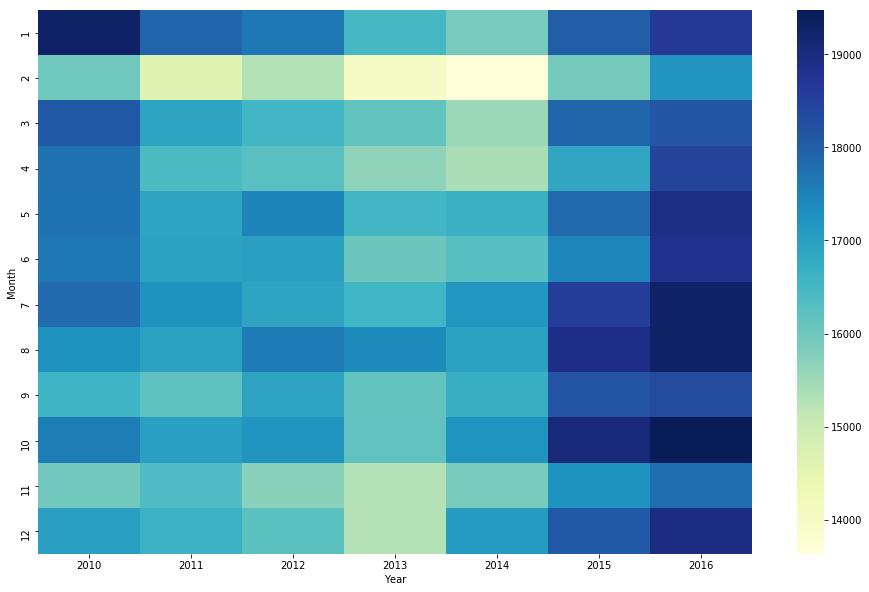

In [20]:
date_frame = "select MONTH(Date) as Month, Year(Date) as Year, COUNT(DR_Number) as Count FROM la_crime_data WHERE Year(Date)!=2017 GROUP BY MONTH(Date),YEAR(Date)"
df_type1=pd.DataFrame(pd.read_sql(date_frame,conn))
crime_activity_plot_2010_2016 = df_type1.pivot_table(values='Count',index='Month',columns='Year')
plt.figure(figsize=(16,10))
sns.heatmap(crime_activity_plot_2010_2016,cmap="YlGnBu")
plt.show()

From above heat plot, we can see that generally, the January is the worst in a year, the faburary have less crime compare to other months, the year of 2016 have most crime compare to rest years.

                            Cloud map for type of crimes happens in 2016

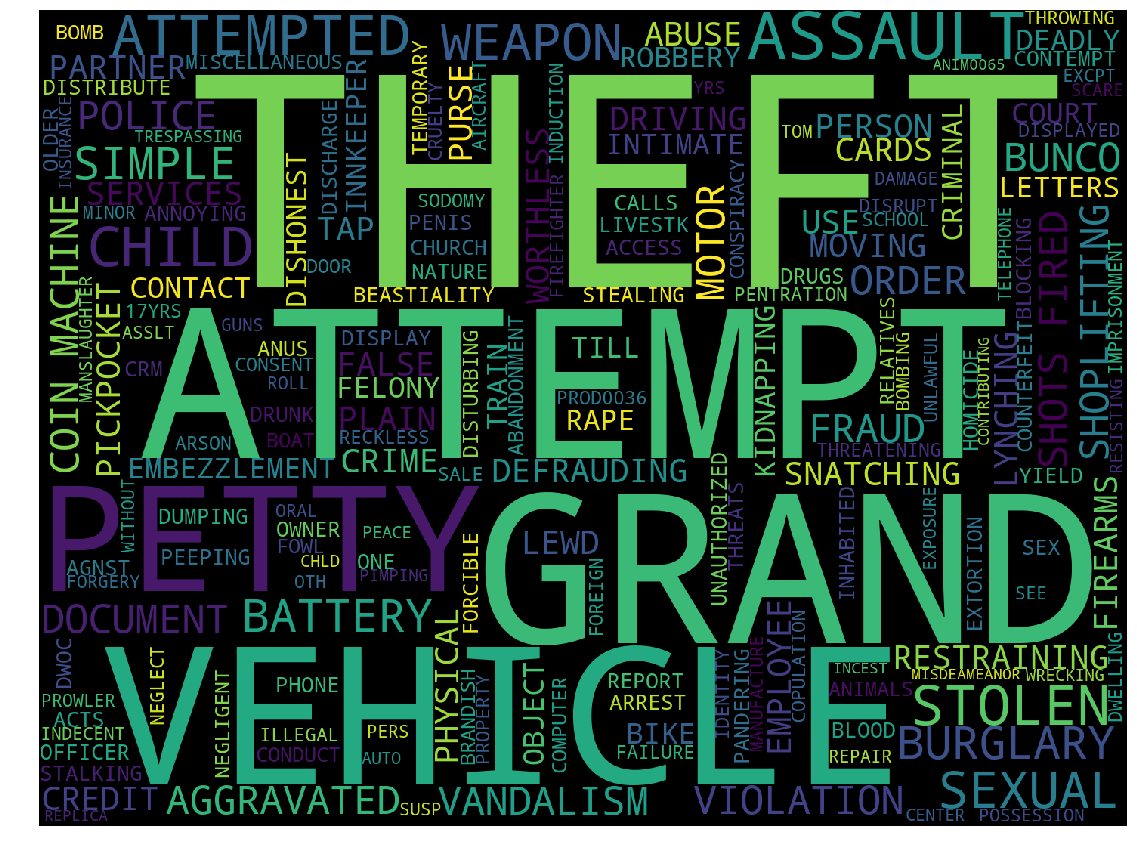

In [21]:
qry_crime_type = "select Crime_Code_Description as Crime_type, count(Crime_Code_Description) counter from la_crime_data where Year(Date)=2016 group by Crime_Code order by counter desc"
df_type2=pd.DataFrame(pd.read_sql(qry_crime_type,conn))
cloud = WordCloud(width=1440, height=1080).generate(" ".join(df_type2['Crime_type'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

From above word cloud map, we can see that the most frequent crimes that happens in 2016 is theft, assault, attempt, 
vehicle stolen, etc.

                                            Top 10 crimes happened in 2016

<class 'pandas.core.frame.DataFrame'>


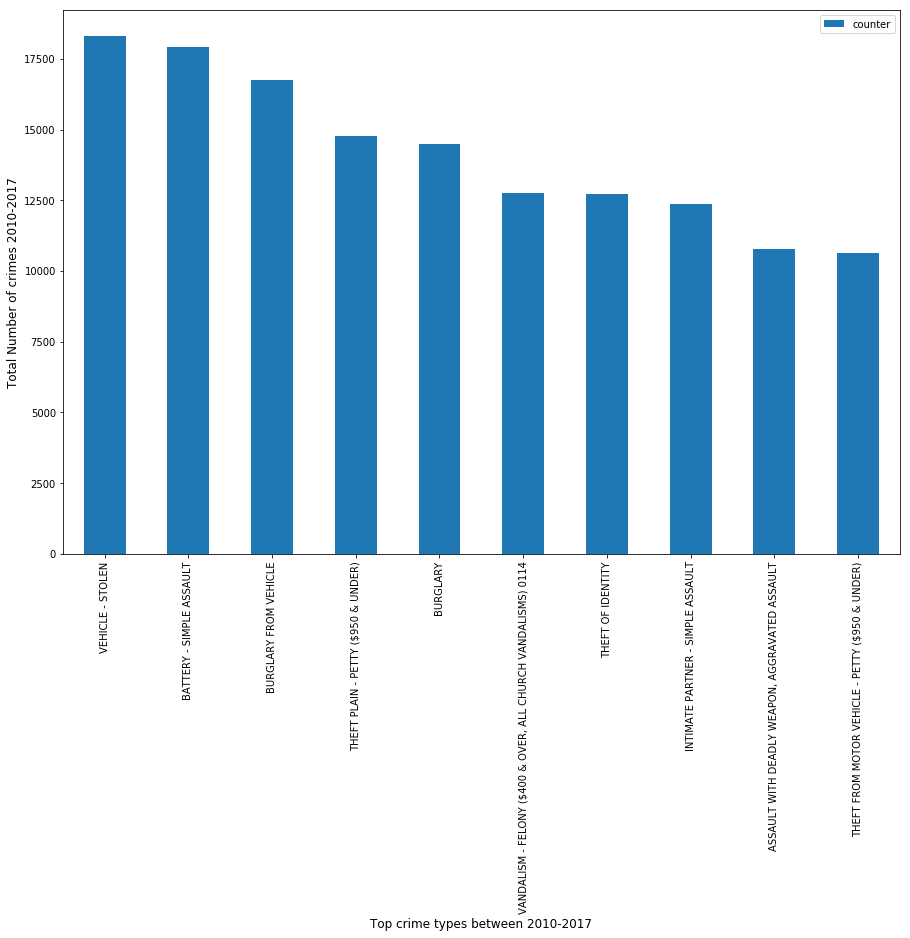

In [16]:
qry_crime_type = "select Crime_Code_Description as Crime_type, count(Crime_Code_Description) counter from la_crime_data where Year(Date)=2016 group by Crime_Code order by counter desc"
df_type=pd.DataFrame(pd.read_sql(qry_crime_type,conn))
top_df_type_cut = df_type[:10]
print(type(top_df_type_cut))
#plt.figure(figsize=(20, 12))
ax=top_df_type_cut.plot(x="Crime_type", y= "counter", kind="bar", figsize=(15,10))
#ax = top_df_type_cut[['Crime_type','counter']].plot(kind='bar',title="Top crime type", figsize=(15,10),legend=False,fontsize=12)
ax.set_xlabel("Top crime types between 2010-2017",fontsize=12)
ax.set_ylabel("Total Number of crimes 2010-2017", fontsize=12)
plt.show()

From above figure, we can see in 2016, the battery, stolen, burglary is the most cases that happened, we also can have an idea exactly how many cases happened, for battery and stolen it's around 16000, for burglary from vehicle is around 15000. We can do more analysis on battery that happens in 2016.

                            Top criminal homicide map distribution in LA in 2016

In [18]:
qry_folium1 = "SELECT Location as location_2016 FROM la_crime_data where YEAR(Date)=2016 and Crime_Code_Description='CRIMINAL HOMICIDE'";
df_folium1=pd.DataFrame(pd.read_sql(qry_folium1,conn))
df_folium1 = df_folium1['location_2016']
df_folium1
crime_list = []
line = 0
for tup in df_folium1:
    try:
        crime_list.append([eval(tup)[0],eval(tup)[1]])
    except:
        print("Invalid tuple!")
robbery_map = folium.Map(location=[34.0288923, -118.2626118], zoom_start=10)
robbery_map.add_children(HeatMap([cur_location for cur_location in crime_list]))
robbery_map.save("la_roberry_2017.html")
robbery_map

/Users/yujialian/Library/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning:

Method `add_children` is deprecated. Please use `add_child` instead.



                The most frequency crime: BATTERY - SIMPLE ASSAULT, cluster distribution in LA 

In [19]:
#los angles: 34.0288923, -118.2626118
qry_folium = "SELECT Location as location_2016 FROM la_crime_data where YEAR(Date)=2016 and Crime_Code_Description='BATTERY - SIMPLE ASSAULT'";
df_folium=pd.DataFrame(pd.read_sql(qry_folium,conn))
crime_list = [[eval(tup)[0],eval(tup)[1]] for tup in df_folium['location_2016']]
map = folium.Map(location=[34.0288923, -118.2626118], zoom_start=15)
map.add_children(MarkerCluster(locations=crime_list))
map.save("la_assault.html")
map

/Users/yujialian/Library/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning:

Method `add_children` is deprecated. Please use `add_child` instead.



We can see that the battery mainly happens in downtown los angles, about totally 9099 happens in that area, bevery
hills also happens 2996 times battery assault. 

                Gender distribution of Battery Simple assault for day time and night time in 2016

/Users/yujialian/Library/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning:

'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.



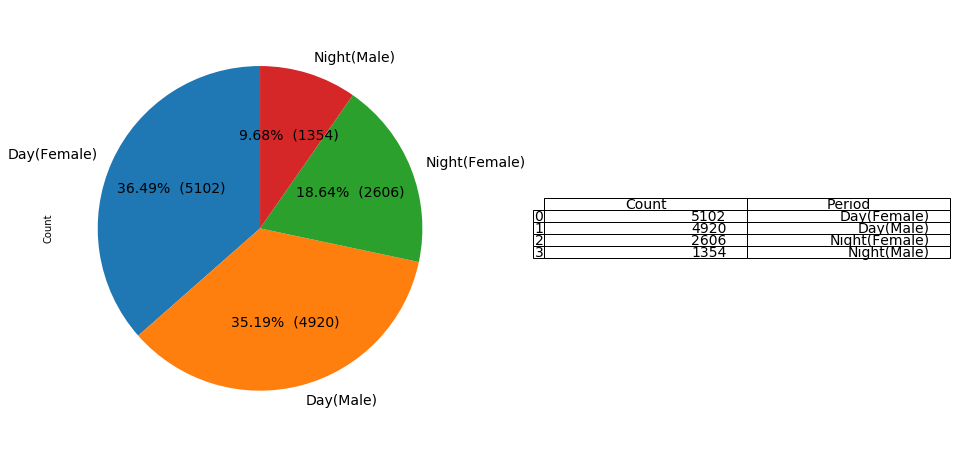

In [12]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
qr_time="""select count(*) as Count,
case
when (Time_Occurred between 600 and 1800) and victim_Sex='F' then 'Day(Female)'
when (Time_Occurred between 600 and 1800) and victim_Sex='M' then 'Day(Male)'
when (Time_Occurred between 1801 and 2359) and victim_Sex='F' then 'Night(Female)'
when (Time_Occurred between 0000 and 599) and victim_Sex='M' then 'Night(Male)'
else 'UNDEFINED'
end as Period
from la_crime_data where YEAR(Date)=2016 and Crime_Code_Description='BATTERY - SIMPLE ASSAULT' group by Period;"""
df_time=pd.DataFrame(pd.read_sql(qr_time,conn))
df_time = df_time.drop(4)
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_time.plot(kind='pie',y = 'Count', ax=ax1, autopct=make_autopct(df_time["Count"]), 
 startangle=90, shadow=False, labels=df_time['Period'], legend = False, fontsize=14)
#plt.pie(df_time["Count"])
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df_time, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

Number of victims distribution according to gender.

We analysis the most frequent crimes that happens in 2016, which is We can see is SIMPLE ASSAULT, we want to see the gender distribution of this crime, from the pie graph, we can see that during day time, the number of victim between each gender is about the same, but during the night time, the number of victim for famale is 2 times more than male.

1. Highest crimes were recorded in the year 2016.

2. If we segregate victims by descent, Hispanic/Latin/Mexican accounted for most number of victims by descent.

3. 7% of all crimes took place in the area - 77th Street, making it the most dangerous area in LA city.

4. Crimes involving thefts were highest.

5. Crimes in February have been considerably low from 2010 through 2017 and January has recorded more than average crimes from 2010 through 2017.

